In [1]:
## Install pandas data reader
##!pip install pandas-datareader

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Read Google stocks data from yahoo
df_google = pdr.get_data_yahoo('GOOGL')
df_google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-13,843.729980,837.849976,841.039978,840.179993,1073700,840.179993
2017-04-17,855.640015,841.030029,841.380005,855.130005,1049100,855.130005
2017-04-18,857.390015,851.250000,852.539978,853.989990,936200,853.989990
2017-04-19,860.200012,853.530029,857.390015,856.510010,1080300,856.510010
2017-04-20,863.929993,857.500000,859.739990,860.080017,1188800,860.080017


In [4]:
df_google.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-07,2743.290039,2684.550049,2720.199951,2717.770020,1311700,2717.770020
2022-04-08,2713.399902,2659.310059,2711.669922,2665.750000,1256000,2665.750000
2022-04-11,2641.850098,2573.370117,2636.469971,2576.469971,1844200,2576.469971
2022-04-12,2632.000000,2535.780029,2632.000000,2554.290039,1633400,2554.290039
2022-04-13,2601.989990,2555.000000,2560.000000,2601.320068,623367,2601.320068


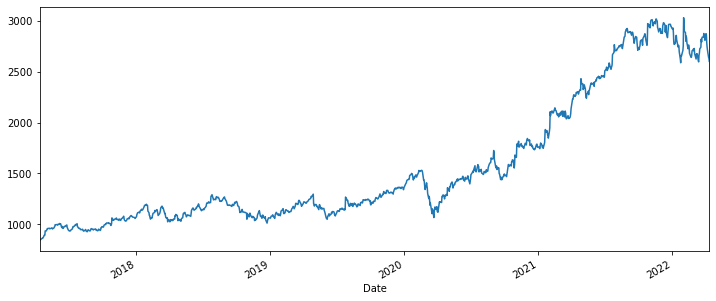

In [5]:
df_google['High'].plot(figsize=(12,5))

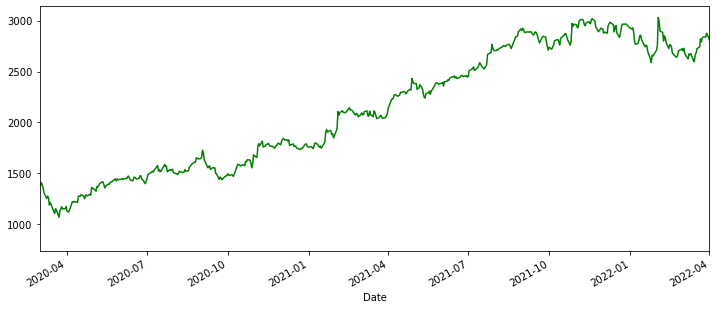

In [6]:
#Consider data during the pandemic
df_google['High'].plot(xlim=['2020-03-01', '2022-04-01'], figsize=(12,5), c='green')

In [7]:
index_google=df_google.loc['2020-03-01':'2022-04-01'].index
stock_open_google=df_google.loc['2020-03-01':'2022-04-01']['Open']

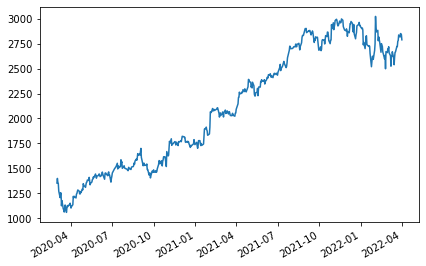

In [8]:
figure,axis=plt.subplots()
plt.tight_layout()
#prevent overlapping of dates in x-axis
figure.autofmt_xdate()
axis.plot(index_google, stock_open_google)

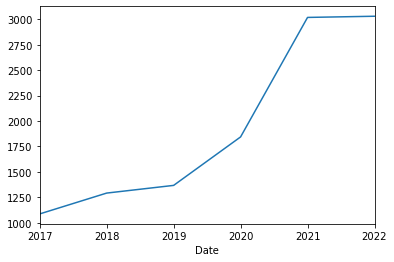

In [9]:
# year end frequency
df_google.resample(rule='A').max()['High'].plot()

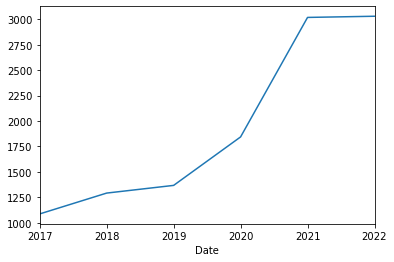

In [10]:
# year end frequency
df_google.resample(rule='A').max()['High'].plot()

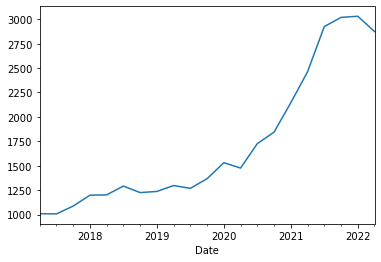

In [11]:
# quaterly frequency
df_google.resample(rule='QS').max()['High'].plot()

## SMA (Simple Moving Average)

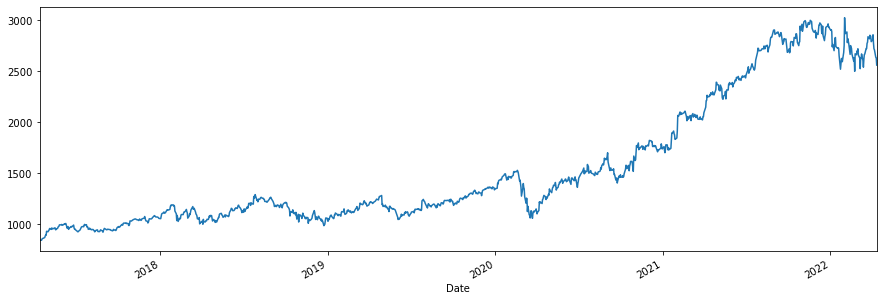

In [19]:
df_google['Open'].plot(figsize=(15,5))

In [17]:
df_google['Open: 10 days rolling']=df_google['Open'].rolling(window=10, min_periods=1).mean()

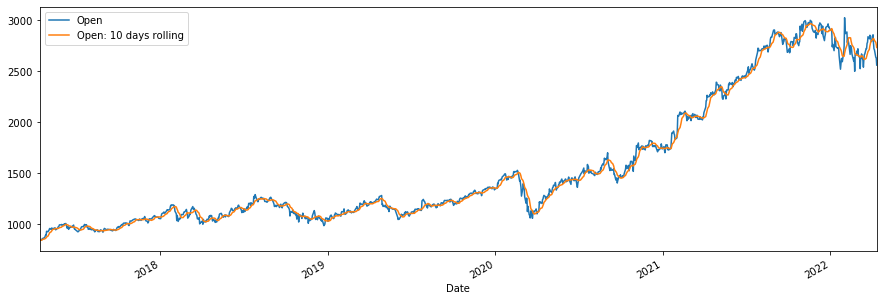

In [20]:
df_google[['Open', 'Open: 10 days rolling']].plot(figsize=(15,5))

## Cumulative Moving Average (CMA)

In [25]:
df_google['Open: CMA']=df_google['Open'].expanding().mean()

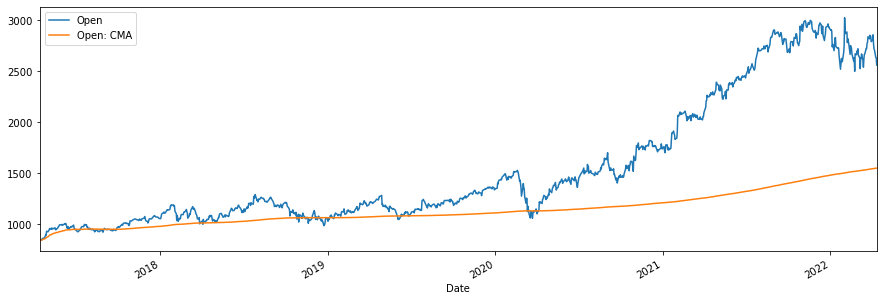

In [26]:
df_google[['Open', 'Open: CMA']].plot(figsize=(15,5))

## Exponential Moving Average (EMA)

In [27]:
df_google['EMA_0.1']=df_google['Open'].ewm(alpha=0.1, adjust=False).mean()

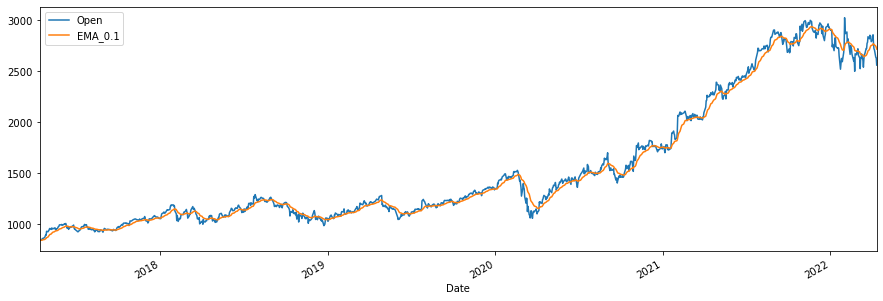

In [28]:
df_google[['Open', 'EMA_0.1']].plot(figsize=(15,5))